<center>
<h1>Welcome to Ada_TheCodeCaster</h1>
<h3>Episode 1</h3>
<h3>by AdaFactor Channel</h3>
</center>



<b>Today topics</b>
1. What's Image Noise
- How do I reduce noise in my picture?
- Solve Interview Problem

#  1. What's Image Noise <br>
<center>
"Image noise is an undesirable by-product of image capture that obscures the desired information."
</center>

## Causes 
1. Sensor size
- Sensor fill factor
- Sensor heat

<img src="./images/fillfactor.png" />
<center> figure 1, Show percentage of photosite or Fill factor </center>

## Types 
 <table style="width:100%">
  <tr>
    <th><center>Gaussian Noise</center></th>
    <th><center>Salt and Pepper Noise</center></th>
    <th><center>Periodic noise</center></th>
  </tr>
  <tr>
    <td><img src="./images/gaussianNoise.png" /></td>
    <td><img src="./images/saltandpepper.png" /></td>
    <td><img src="./images/periodicNoise.png" /></td>
  </tr>
  <tr>
    <td>
    <center>
        Statistical noise having a proability density function (PDF) = Gaussian distribution
    </center>
    </td>
    <td>
    <center>
    Dark pixels in bright regions and bright pixels in dark regions.
    </center>
    </td>
    <td>
    <center>
    Look like a repeating pattern has been added on top of the original image.
    </center>
    </td>
  </tr>
</table> 

# 2. How do I reduce noise from my picture?

## Our tools ( for today )
1. <b> Mean Filter </b><br>
1.1 Arithmetric Mean Filter<br>
1.2 Geometric Mean Filter<br>
1.3 Harmonic Mean Filter<br>

- <b> Median Filter </b><br>
- <b> Max and Min Filter </b>

## 1.1 Arithmetric Mean Filter

$$ f(x, y) = \frac{1}{mn}\sum_{(s,t)\in S_{xy}}g(s, t) $$
where,<br> $ S_{xy} = $ Pixels in the region and its center coordinate at (x, y)

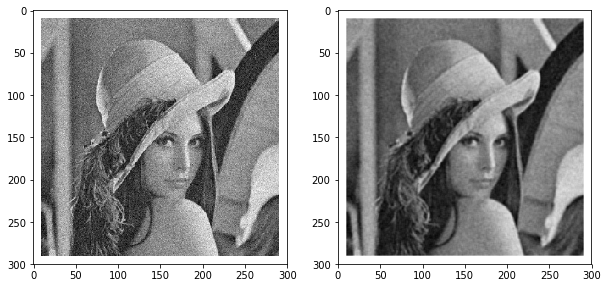

In [132]:
''' Arithmetric Mean Filter '''
%matplotlib inline

from skimage import io, color
from skimage.transform import resize
import matplotlib.pyplot as plt
import numpy as np



class Point:
    def __init__(self,x , y):
        self.x = x
        self.y = y

def get_region(point, shape):
    x = point.x
    y = point.y
    region_index = [
        Point(x-1, y-1), Point(x, y-1), Point(x+1, y-1),
        Point(x-1, y), Point(x, y), Point(x+1, y),
        Point(x-1, y+1), Point(x, y+1), Point(x+1, y+1)
    ]
    region_index = [ p for p in region_index if (p.x > 0 and p.y > 0) and (p.x < shape[0] and p.y < shape[1])]
    return region_index

def mean_filter(data):
        return sum(data)/len(data)

img = io.imread('./images/gaussianNoise.png', as_gray=True)
img = resize(img, (300,300),  mode='reflect')
g_img = color.rgb2gray(img)
result_img = np.ndarray(shape=g_img.shape, dtype=float)

for row in range(g_img.shape[0]):
    for col in range(g_img.shape[1]):
        p = Point(row, col)
        region = get_region(p, g_img.shape)
        data = [ g_img[i.x, i.y] for i in region ]
        f_xy = mean_filter(data)
        result_img[p.x, p.y] = f_xy
fig = plt.figure(figsize=(10,10))

fig.add_subplot(121)
plt.imshow(g_img, cmap='gray')

fig.add_subplot(122)
plt.imshow(result_img, cmap='gray')

plt.show()


## 1.2 Geometric Mean Filter

$$ f(x, y) = \lbrack \prod_{(s,t)\in S_{xy}}g(s, t) \rbrack^\frac{1}{mn}$$
where,<br> $ S_{xy} = $ Pixels in the region and its center coordinate at (x, y)

## 1.3 Harmonic Mean Filter

$$ f(x, y) = \frac{mn}{\sum_{(s,t)\in S_{xy}}\frac{1}{g(s, t)}} $$
where,<br> $ S_{xy} = $ Pixels in the region and its center coordinate at (x, y)

## 2.  Median Filter

$$ \hat f(x, y) = \underset{(s,t)\in S_{xy}}{\mathrm{median}} \{g(s,t)\} $$

## 3.  Max and Min Filter

$$ \hat f(x, y) = \underset{(s,t)\in S_{xy}}{\mathrm{max}} \{g(s,t)\} $$
<br>
$$ \hat f(x, y) = \underset{(s,t)\in S_{xy}}{\mathrm{min}} \{g(s,t)\} $$